# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


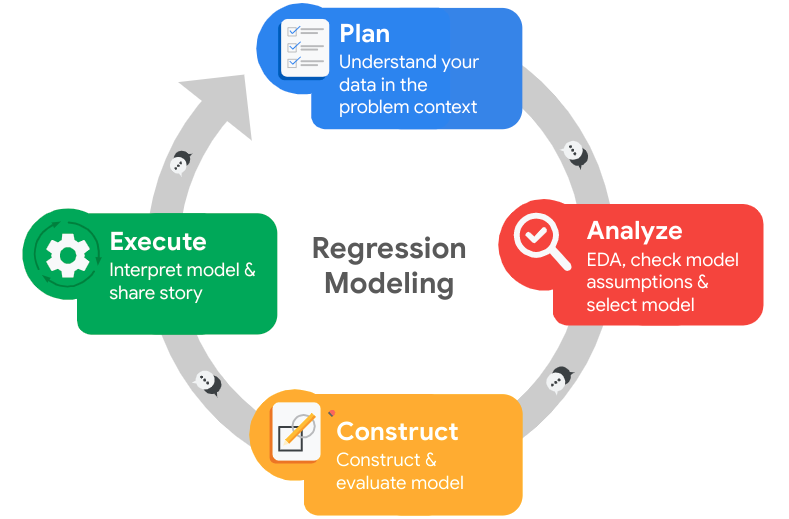

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

#for data manipulation
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for displaying all columns in dataframes
pd.set_option('display.max_columns', None)

# for data modelling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#for metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score,\
precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
    
# for saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Tenure seems to have a max value mmuch higher than the 75 percent quartile hence it must be checked.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns= {'Work_accident' : 'work_accident',
                    'average_montly_hours' : 'average_monthly_hours',
                    'Department' : 'department',
                    'time_spend_company' : 'tenure'})

# Display all column names after the update
df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

This dataset has no missing values.

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
print(f""" There are {df0.duplicated().sum()} duplicates out of {df0.shape[0]} rows which is {round(df0.duplicated().sum()*100/df0.shape[0],2)} percent of the data.""")

 There are 3008 duplicates out of 14999 rows which is 20.05 percent of the data.


In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = 'first') ## dropping the duplicates by just keeping the first observation of the duplicates

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

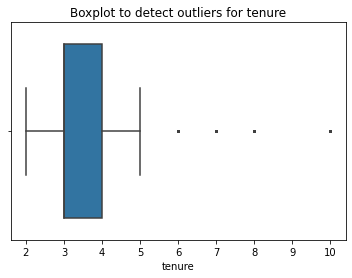

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(data = df1,
            x = 'tenure',
           fliersize = 1,
           )
plt.title('Boxplot to detect outliers for tenure')
plt.show()

In [12]:
# Determine the number of rows containing outliers

Q1 = df1['tenure'].quantile(0.25) # calculating 1st quartile
Q3 = df1['tenure'].quantile(0.75) # calculating 3rd quartile

IQR = Q3 - Q1 # interquartile range

upper_limit = Q3 + 1.5*IQR
lower_limit = Q3 - 1.5*IQR

print("upper_limit: ", upper_limit) # printing the upper limit
print("lower_limit: ", lower_limit) # printing the lower limit

outliers = df1[(df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)] # Extracting the outliers

print(f"There are {len(outliers)} number of outliers in `tenure`")

upper_limit:  5.5
lower_limit:  2.5
There are 3734 number of outliers in `tenure`


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True)*100)

0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


83 percent of people stayed and 16 percent of people left the company.


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

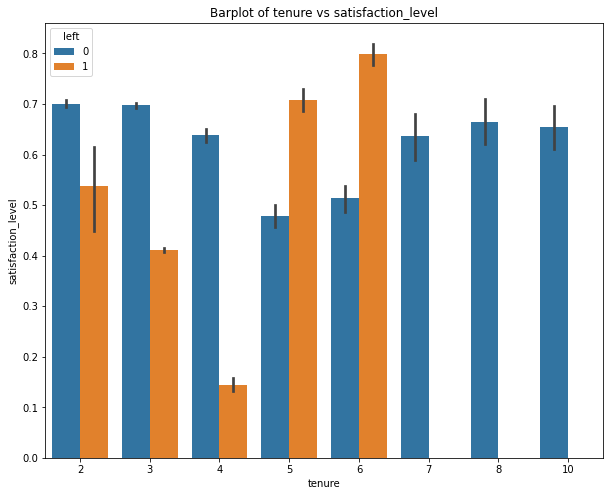

In [14]:
# Box plot of tenure Vs satisfaction_level
plt.figure(figsize=(10,8))
sns.barplot(data = df1, 
            y = 'satisfaction_level', 
            x = 'tenure',
            hue = 'left',)
plt.title("Barplot of tenure vs satisfaction_level")
plt.show()


Most people left during 5 to 6 years of thier tenure. After 6 years no one seems to leave the company.


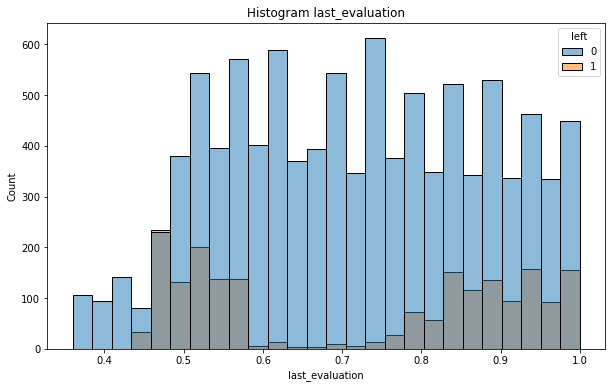

In [29]:
#Histogram of salary vs last_evaluation
plt.figure(figsize=(10,6))
sns.histplot(data = df1,  
            x = 'last_evaluation',
            hue = 'left',
            multiple='layer' 
            )
plt.title("Histogram last_evaluation")
plt.show()

As the workers evaluation rises initially the people who leaves falls but after a certain point it starts rising . This maybe because of the fact that when their evaluation rises they feel they are not compensated properly in the company and leaves or maybe thier skill level is higher than thier current role which leaves them unsatisfied.

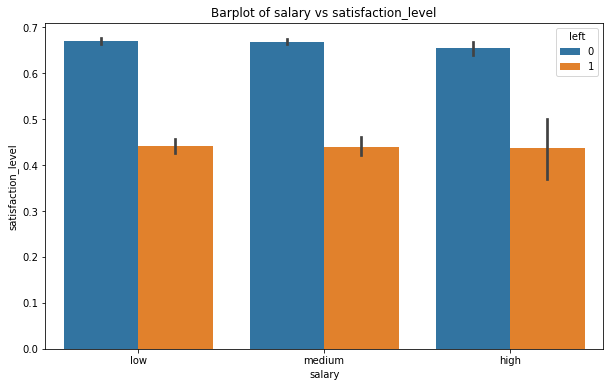

In [27]:
# Box plot of salary Vs satisfaction_level
plt.figure(figsize=(10,6))
sns.barplot(data = df1, 
            y = 'satisfaction_level', 
            x = 'salary',
            hue = 'left')
plt.title("Barplot of salary vs satisfaction_level")
plt.show()

The distribustion of people who left vs those who didnt is the same for all salary levels, however those who left had clearly lower satisfaction level.

In [16]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


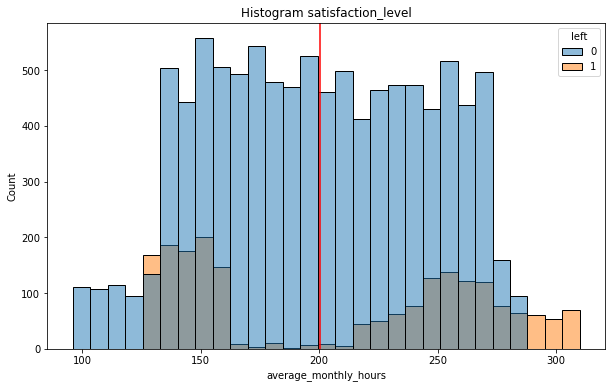

In [17]:
#Histogram of salary vs satisfaction_level
plt.figure(figsize=(10,6))
sns.histplot(data = df1,  
            x = 'average_monthly_hours',
            hue = 'left',
            multiple='layer' 
            )
plt.axvline(df1['average_monthly_hours'].mean(), color = 'red')
plt.title("Histogram satisfaction_level")
plt.show()

In range of 220 - 300 montly hours people tend to start leaving.
Moreover even below mean at range of approximately 120-160 people tend to leave the company too. Hence we cannot see any particular trend in realtion to average monthly hours.

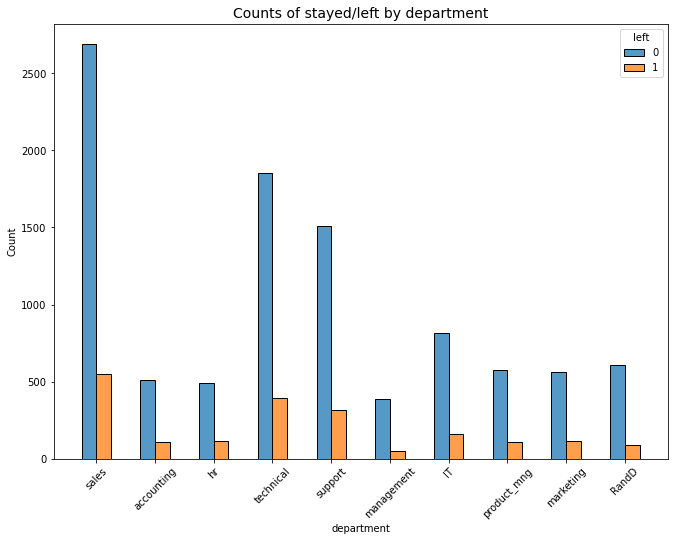

In [58]:
#Histogram of department
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

Relatively larger proportion of technical and support guys tend to leave the company as compared to other departments. This might indicate there might be some room for imporvement.

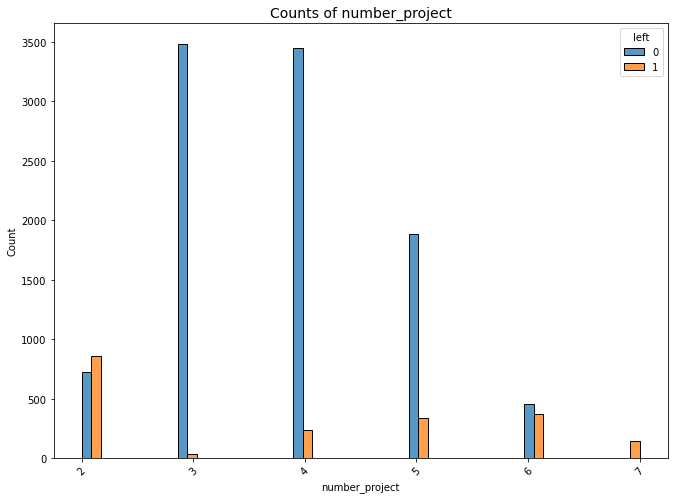

In [22]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='number_project', hue='left', 
             hue_order=[0, 1], multiple='dodge', )
plt.xticks(rotation='45')
plt.title('Counts of number_project', fontsize=14);

We can see after from 3 to 6 no of projects there is an increasing no of people who tend to leave as no of projects increases.

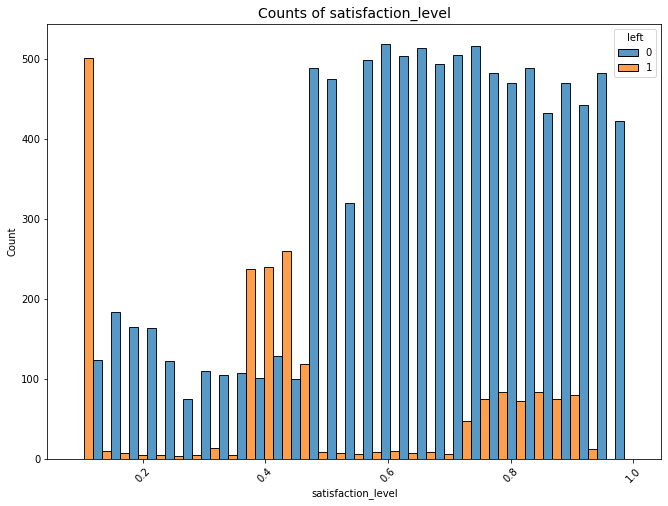

In [20]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='satisfaction_level', hue='left', 
             hue_order=[0, 1], multiple='dodge', )
plt.xticks(rotation='45')
plt.title('Counts of satisfaction_level', fontsize=14);

There is a very clear relationship between satisfaction level and the people who left. As satisfaction level rises the people who tend to leave falls.

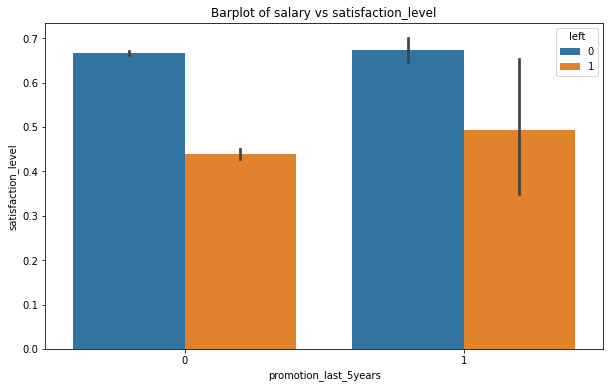

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data = df1, 
            y = 'satisfaction_level', 
            x = 'promotion_last_5years',
            hue = 'left',)
plt.title("Barplot of salary vs satisfaction_level")
plt.show()

Whether the employees got a promotion the last 5 years or not didnt really matter to the distribution of people leaving vs not leaving moreover after getting promotion some people tend to leave more.

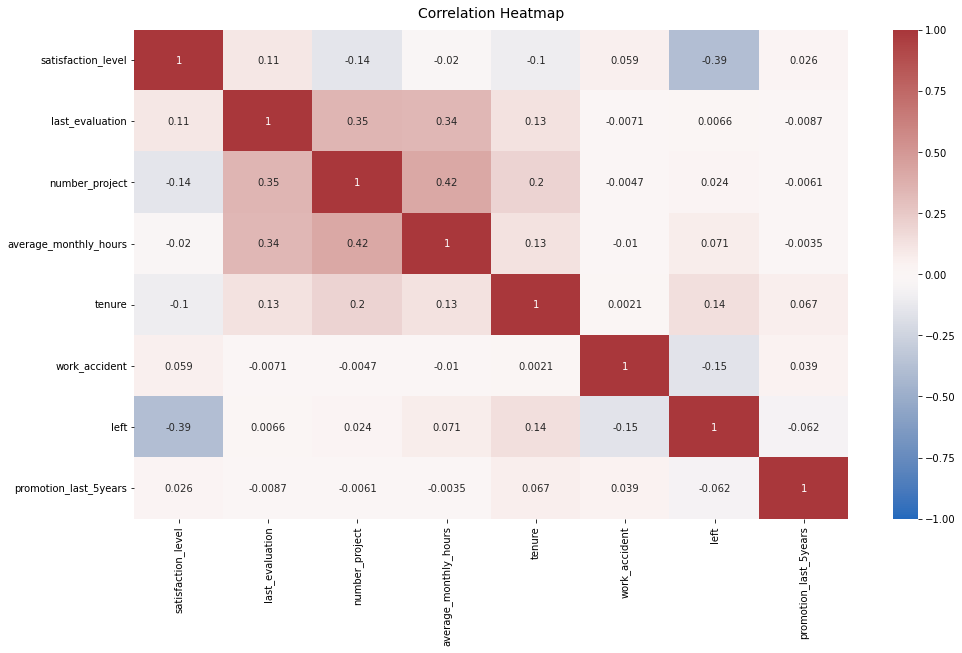

In [75]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);


In [53]:
# Checking the distirbution of left
df_logreg['left'].value_counts(normalize=True)

0    0.775827
1    0.224173
Name: left, dtype: float64

The data is spit in 78:22 split which is acceptable for our model

### Insights

It appears that employees are leaving the company as a result of poor management. We see `left` has highest correlation with `satisfaction_level` . However we could see a rough relationship of Leaving to longer working hours, many projects, and generally lower satisfaction levels. Working long hours without promotions or recognition can be demotivating, leading to burnout among many employees. Interestingly, those with over six years at the company tend to stay despite these challenges.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

In [23]:
df1.columnsx

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

# Logistic Regression Model

In [42]:
## Selecting the columns for our logistic model

selected_columns = ['left','satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'department', 'salary']

In [43]:
# Selecting only the columns within the dataframe
df2 = df1[selected_columns]

In [44]:
## Converting the ordinal categorical columns to numerical 
df_encoded = df2.copy() ## creating a copy of the origianl dataframe

# Encoding salary column to categorical
df_encoded['salary'] = (df2['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)

# Encoding department into numerical categories
df_encoded = pd.get_dummies(df_encoded, drop_first= True)

df_encoded.head()

,left,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,1,0.38,0.53,2,157,3,0,0,0,0,0,0,0,1,0,0
1,1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,1,0,0
2,1,0.11,0.88,7,272,4,1,0,0,0,0,0,0,1,0,0
3,1,0.72,0.87,5,223,5,0,0,0,0,0,0,0,1,0,0
4,1,0.37,0.52,2,159,3,0,0,0,0,0,0,0,1,0,0


In [45]:
# Removing outliers as logistic regression is sensitive to outliers
df_logreg = df_encoded[(df_encoded['tenure'] >= lower_limit) & (df_encoded['tenure'] <= upper_limit)]
df_logreg.head()

,left,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,1,0.38,0.53,2,157,3,0,0,0,0,0,0,0,1,0,0
2,1,0.11,0.88,7,272,4,1,0,0,0,0,0,0,1,0,0
3,1,0.72,0.87,5,223,5,0,0,0,0,0,0,0,1,0,0
4,1,0.37,0.52,2,159,3,0,0,0,0,0,0,0,1,0,0
5,1,0.41,0.50,2,153,3,0,0,0,0,0,0,0,1,0,0


In [46]:
# Assigning the X and y
X = df_logreg.drop(columns = ['left'])
y = df_logreg['left']

In [48]:
# Splitting the dataset into train and split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [49]:
# Assigning logistic regression classifier

log_clf = LogisticRegression(random_state = 42, max_iter = 400).fit(X_train, y_train)

In [50]:
# predicting the y for our test data

y_pred = log_clf.predict(X_test)

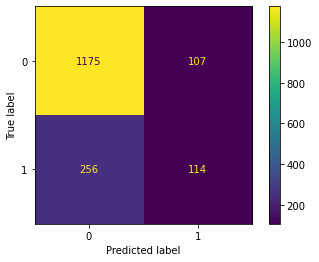

In [52]:
#Creating the confusion matrix for our logistic regression
log_cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)

# Creating Display of our confusion matrix
log_disp = ConfusionMatrixDisplay(log_cm, display_labels = log_clf.classes_)

#Plotting the confusion matrix
log_disp.plot(values_format = '')

#Displat plot
plt.show()

* True Negatives = 1175 (correctly predicting people did not left)
* True Positives = 114  (correctly predicting people left)
* False Negatives = 256 (incorrectly predicting people did not left)
* False Positives = 107 (incorrectly predicting people left)

#### We can see from the classification table that our model can predict true negatives better than true positives. So its not so good at predicting if people will leave 

In [59]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.82      0.92      0.87      1282
    Predicted would leave       0.52      0.31      0.39       370

                 accuracy                           0.78      1652
                macro avg       0.67      0.61      0.63      1652
             weighted avg       0.75      0.78      0.76      1652



##### Our model has very decent accuracy , precision ,recall and f1-score. As our model cannot predict True positives as well precision is a bit lower than recall. However we are most interested in which employeess will leave , so we need to check other models before concluding thsi as our final model.

# Decision Tree Models : Random Forest and Decision Tree

### Decision Tree

In [60]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='precision')

In [61]:
%%time
# Fitting the model
tree1.fit(X_train, y_train)

CPU times: user 2.38 s, sys: 0 ns, total: 2.38 s
Wall time: 2.38 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         

In [65]:
#Best Precision score 
tree1.best_score_

0.9863536545814069

In [63]:
# Best parameters based on precision score
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [66]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [67]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.961141,0.933818,0.947235,0.976684,0.978124


### Random Forest

In [68]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='precision')

In [70]:
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [71]:
rf1.best_score_

0.9879542372577678

In [72]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [73]:
# Comparing results of decision tree vs random forest
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.961141  0.933818  0.947235  0.976684  0.978124
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.974506  0.927741  0.950506  0.978349  0.987133


 We can see that random forest has better precision, F1, accuracy and acu hence random forest is the better tree.

In [74]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
rf1_importances = pd.DataFrame(rf1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
rf1_importances = rf1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
rf1_importances = rf1_importances[rf1_importances['gini_importance'] != 0]
rf1_importances

,gini_importance
satisfaction_level,0.533649
tenure,0.141436
last_evaluation,0.115093
number_project,0.113632
average_monthly_hours,0.079173
salary,0.004636
department_sales,0.002538
department_technical,0.002506
department_support,0.001589
department_accounting,0.001391


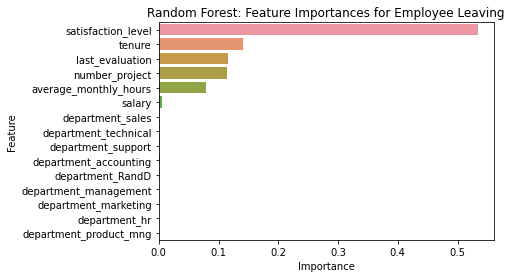

In [76]:
## Plotting the feature importance of random forest

sns.barplot(data=rf1_importances, x="gini_importance", y=rf1_importances.index, orient='h')
plt.title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

We can see satisfaction level has a great amount of importance to whether people leave or not. The next important features are tenure, last_evaluation, number_project and average_monthly_hours

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






####  We can see that random forest is the best model and based on it in order to improve employee retention we need to improve satisfaction level of employees, thier lower satisfaction maybe based on the amount of projects they work on, amount of hours they work, thier salary and other factors. Though `tenure` , `last_evaluation`, `number_projects`, `average_monthly_hours` also has significant feature importance all these features also contribute to employee satisfaction. A further study should be conducted to find out what features improves `satisfaction_level` and so must be done in order to retain more employees.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

* The logistic regression has a precision of 82 percent, recall of 92 percent, f1-score of 97 percent and accuracy of 78 percent.
* The decision tree has a precision of 96 percent, recall of 93 percent, f1-score of 94.7 percent and accuracy of 97.6 percent.
* The decision tree has a precision of 97.5 percent, recall of 92.7 percent, f1-score of 95 percent and accuracy of 97.8 percent.

### Conclusion, Recommendations, Next Steps

### Steps to Improve Employee Retention  
1. **Set Clear Onboarding Programs**: Ensure new employees feel supported during their initial tenure.  
2. **Establish Regular Performance Reviews**: Provide constructive feedback and recognition tied to evaluations.  
3. **Optimize Workload Distribution**: Assign a manageable number of projects to prevent burnout.  
4. **Promote Work-Life Balance**: Implement policies to regulate work hours and discourage excessive overtime.  
5. **Offer Career Development Opportunities**: Provide training, mentorship, and growth paths.  
6. **Recognize and Reward Efforts**: Celebrate achievements to boost morale and motivation.  
7. **Solicit Employee Feedback**: Regularly gather input on job satisfaction and organizational improvements.  
8. **Create Flexible Work Options**: Allow hybrid or remote work where possible to improve engagement.  
9. **Monitor Exit Trends**: Continuously review reasons for resignations and adjust retention strategies.  
10. **Foster a Positive Workplace Culture**: Build trust, inclusivity, and collaboration within teams.  

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.